In [3]:
import pandas as pd
import numpy as np
import os
import warnings


# Machine Learning
Es una disciplina de la inteligencia artificial

## Carga de datos

In [4]:
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
import matplotlib.dates as mdates
import datetime as dt

,Periodo,inf_gt_interanual
0,01/01/2005,0.0904
1,01/02/2005,0.0904
2,01/03/2005,0.0877
3,01/04/2005,0.0888
4,01/05/2005,0.0852
...,...,...
204,01/01/2022,0.0287
205,01/02/2022,0.0298
206,01/03/2022,0.0417
207,01/04/2022,0.0462


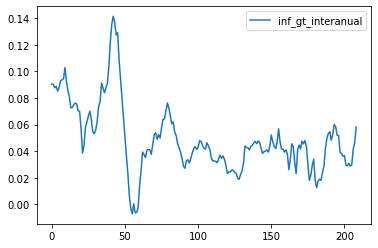

In [5]:
df = pd.read_csv("Data/datainflacion.csv")
inflacionInteranual = df[["Periodo","inf_gt_interanual"]]

inflacionInteranual.plot()
inflacionInteranual

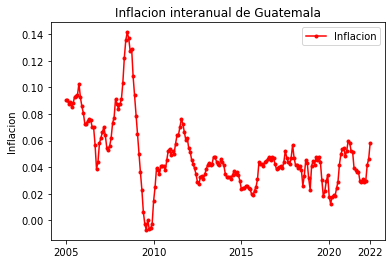

In [6]:
plt.plot(inflacionInteranual.Periodo,inflacionInteranual.inf_gt_interanual, 'r.-', label = 'Inflacion')
plt.title('Inflacion interanual de Guatemala')
plt.ylabel('Inflacion')
plt.legend()
plt.xticks([0,60,120,180,208],['2005','2010','2015','2020','2022'])


#inflacionInteranual.Periodo[::3].tolist()+[2021]
plt.show()

[(0.0, 50.0)]

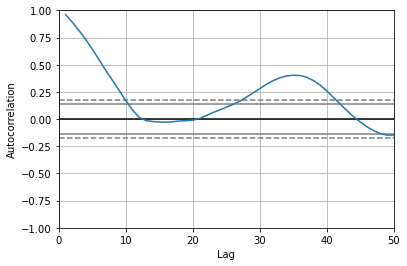

In [7]:
pd.plotting.autocorrelation_plot(inflacionInteranual.inf_gt_interanual).set(xlim = [0,50])

Para la Autocorrelacion y la Autocorrelacion parcial

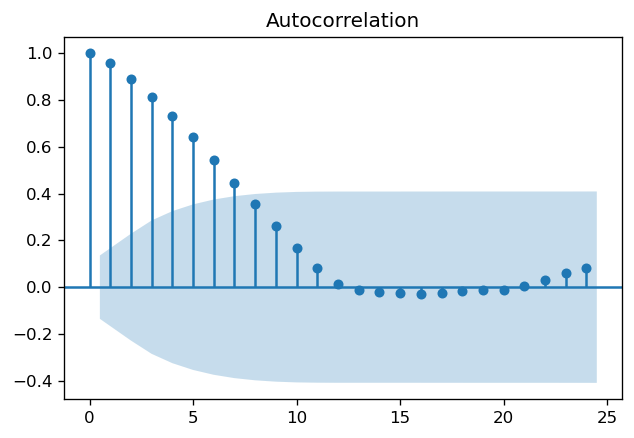

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
plot_acf(inflacionInteranual.inf_gt_interanual)
plt.show()

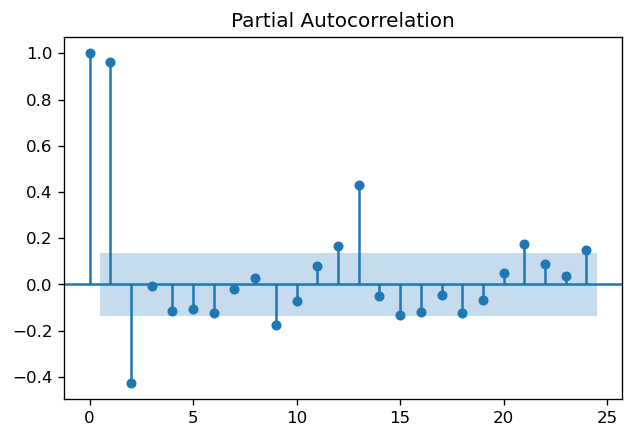

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(inflacionInteranual.inf_gt_interanual)
plt.show()

Dickey-Fuller test

In [10]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
def adf_test(series):
    result = adfuller(series, autolag='AIC') #regression='ct'
    print(); print(f'ADF Statistic: {result[0]}')
    print();  print(f'p-value: {result[1]}')
    print();  print(f'n_lags: {result[2]}')

    print(); print('Critial Values:')
    for key, value in result[4].items():
        print(f'   {key}, {value}')   

adf_test(inflacionInteranual.inf_gt_interanual)


ADF Statistic: -2.2669010748116656

p-value: 0.18286528840373362

n_lags: 13

Critial Values:
   1%, -3.464337030867007
   5%, -2.876478799035722
   10%, -2.574733103221565


Prueba KPSS

In [11]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):    
    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    
    # Format Output
    print(); print(f'KPSS Statistic: {statistic}')
    print(); print(f'p-value: {p_value}')
    print(); print(f'num lags: {n_lags}')
    print(); print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    
kpss_test(inflacionInteranual.inf_gt_interanual)


KPSS Statistic: 0.6470763699083445

p-value: 0.018356693644695953

num lags: 15

Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


/home/rednew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


### Para encontrar el orden de diferenciacion optimo en un modelo ARIMA

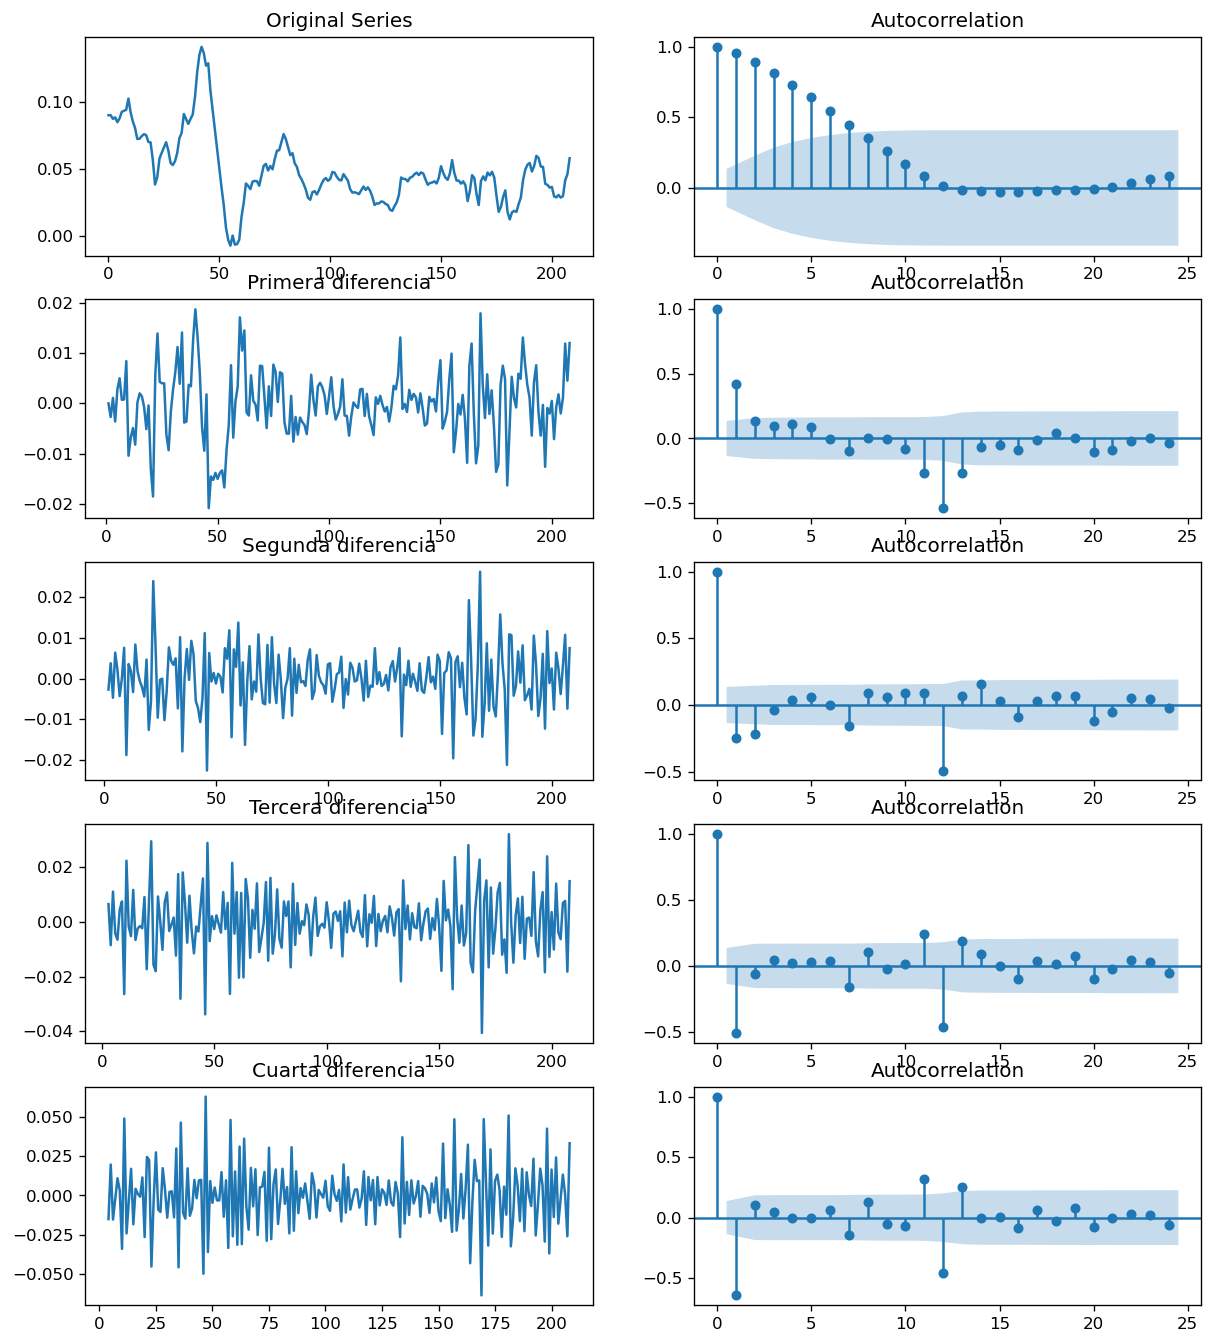

In [57]:
plt.rcParams.update({'figure.figsize':(12,14), 'figure.dpi':120})

# Import data
#df = pd.read_csv('shampoo.csv', header=0, names = ['Sales'])
#df.reset_index(drop=True, inplace=True)

# Original Series
fig, axes = plt.subplots(5, 2, sharex=False)
axes[0, 0].plot(inflacionInteranual.inf_gt_interanual); axes[0, 0].set_title('Original Series')
plot_acf(inflacionInteranual.inf_gt_interanual, ax=axes[0, 1])

# 1st Differencing
df1 = inflacionInteranual.inf_gt_interanual.diff()
axes[1, 0].plot(df1); axes[1, 0].set_title('Primera diferencia')
plot_acf(df1.dropna(), ax=axes[1, 1])

# 2nd Differencing
df2 = inflacionInteranual.inf_gt_interanual.diff().diff()
axes[2, 0].plot(df2); axes[2, 0].set_title('Segunda diferencia')
plot_acf(df2.dropna(), ax=axes[2, 1])

# 3rd Differencing
df3 = inflacionInteranual.inf_gt_interanual.diff().diff().diff()
axes[3, 0].plot(df3); axes[3, 0].set_title('Tercera diferencia')
plot_acf(df3.dropna(), ax=axes[3, 1])

# 3rd Differencing
df4 = inflacionInteranual.inf_gt_interanual.diff().diff().diff().diff()
axes[4, 0].plot(df4); axes[4, 0].set_title('Cuarta diferencia')
plot_acf(df4.dropna(), ax=axes[4, 1])

plt.show()

Estadistica de ADF y KPSS 

In [13]:
warnings.filterwarnings("ignore")

print("---------------------------------------------")
print("Primera diferencia: ")
print("---------------------------------------------")
df1 = inflacionInteranual.inf_gt_interanual.diff()
print(); print("---------------------------------------------")
adf_test(df1.dropna())
print(); print("---------------------------------------------")
kpss_test(df1.dropna())
print(); print("---------------------------------------------")


print(); print("---------------------------------------------")
print("Segunda diferencia: ")
print("---------------------------------------------")
df2 = inflacionInteranual.inf_gt_interanual.diff().diff()
print(); print("---------------------------------------------")
adf_test(df2.dropna())
print(); print("---------------------------------------------")
kpss_test(df2.dropna())
print(); print("---------------------------------------------")

print(); print("---------------------------------------------")
print("Tercera diferencia: ")
print("---------------------------------------------")
df3 = inflacionInteranual.inf_gt_interanual.diff().diff().diff()
print(); print("---------------------------------------------")
adf_test(df3.dropna())
print(); print("---------------------------------------------")
kpss_test(df3.dropna())
print(); print("---------------------------------------------")

print(); print("---------------------------------------------")
print("Cuarta diferencia: ")
print("---------------------------------------------")
df4 = inflacionInteranual.inf_gt_interanual.diff().diff().diff().diff()
print(); print("---------------------------------------------")
adf_test(df4.dropna())
print(); print("---------------------------------------------")
kpss_test(df4.dropna())
print(); print("---------------------------------------------")

---------------------------------------------
Primera diferencia: 
---------------------------------------------

---------------------------------------------

ADF Statistic: -5.988235741371002

p-value: 1.7709835824927618e-07

n_lags: 12

Critial Values:
   1%, -3.464337030867007
   5%, -2.876478799035722
   10%, -2.574733103221565

---------------------------------------------

KPSS Statistic: 0.06847889971786895

p-value: 0.1

num lags: 15

Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

---------------------------------------------

---------------------------------------------
Segunda diferencia: 
---------------------------------------------

---------------------------------------------

ADF Statistic: -6.984837829310654

p-value: 8.018234871104528e-10

n_lags: 15

Critial Values:
   1%, -3.465058702600837
   5%, -2.8767942675230356
   10%, -2.5749014492475535

---------------------------------------------

KPSS Statistic: 0.06475020031622782

p-valu

Para encontrar el orden del termino autoregresivo

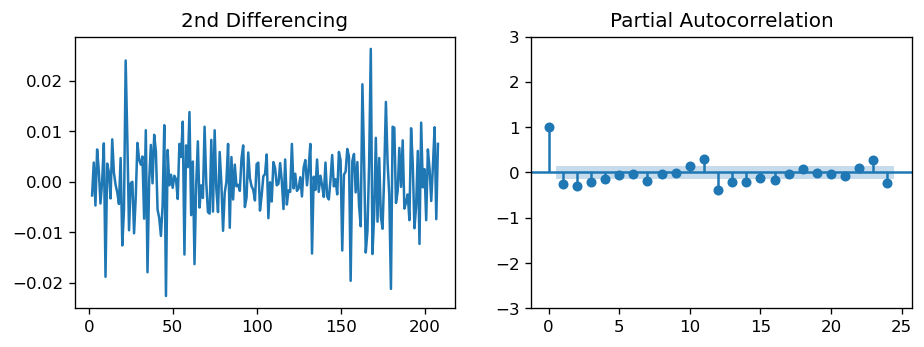

In [60]:
# PACF plot 
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=False)

df2 = inflacionInteranual.inf_gt_interanual.diff().diff() #.diff() #.diff()

axes[0].plot(df2); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(-3,3)) #, xlim=(-1,25)
plot_pacf(df2.dropna(), ax=axes[1]) #PACF

plt.show()


Para encontrar el orden del termino MA

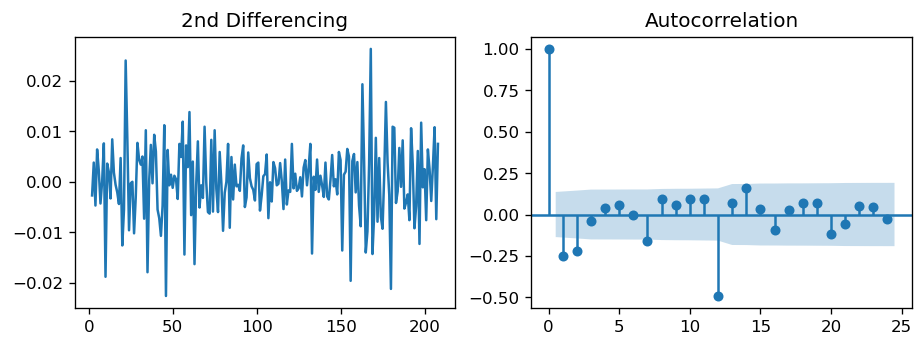

In [61]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=False)

#df2 = df["Inflation_ConsumerPrice_Annual_Percentage"].diff().diff() #.diff() #.diff()
axes[0].plot(df2); axes[0].set_title('2nd Differencing')
#axes[1].set(ylim=(0,1.2))
plot_acf(df2.dropna(), ax=axes[1]) # ACF

plt.show()


ADF test en la segunda diferencia

In [16]:
adf_test(df2.dropna())



ADF Statistic: -6.984837829310654

p-value: 8.018234871104528e-10

n_lags: 15

Critial Values:
   1%, -3.465058702600837
   5%, -2.8767942675230356
   10%, -2.5749014492475535


## Construyendo el modelo ARIMA

In [17]:
from statsmodels.tsa.arima_model import ARIMA

                              ARMA Model Results                              
Dep. Variable:      inf_gt_interanual   No. Observations:                  209
Model:                     ARMA(2, 0)   Log Likelihood                 769.224
Method:                       css-mle   S.D. of innovations              0.006
Date:                Tue, 16 Aug 2022   AIC                          -1530.448
Time:                        09:23:28   BIC                          -1517.079
Sample:                             0   HQIC                         -1525.043
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0517      0.008      6.293      0.000       0.036       0.068
ar.L1.inf_gt_interanual     1.4026      0.062     22.689      0.000       1.281       1.524


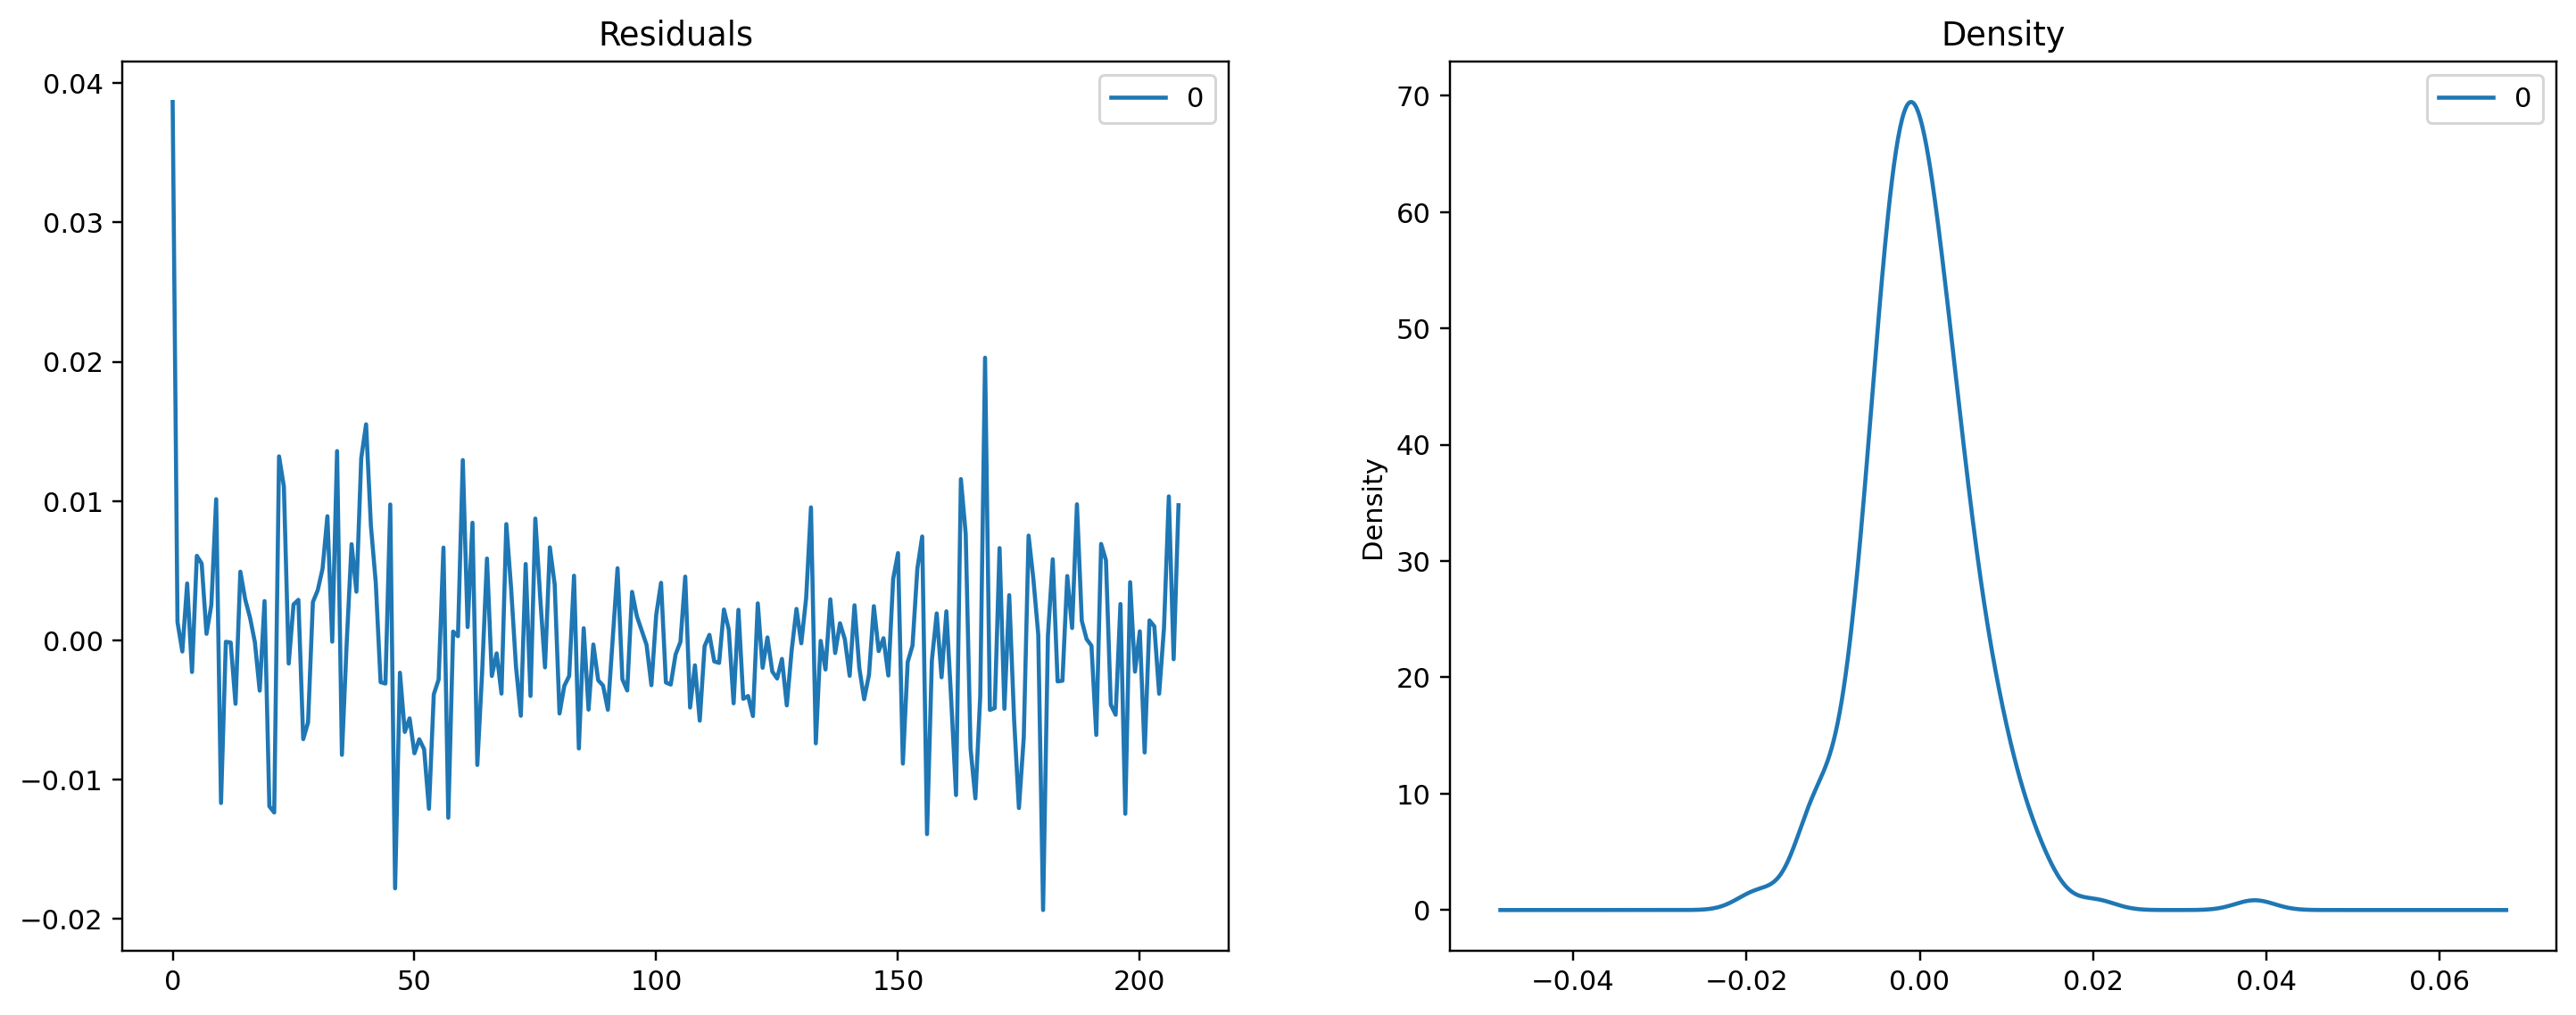

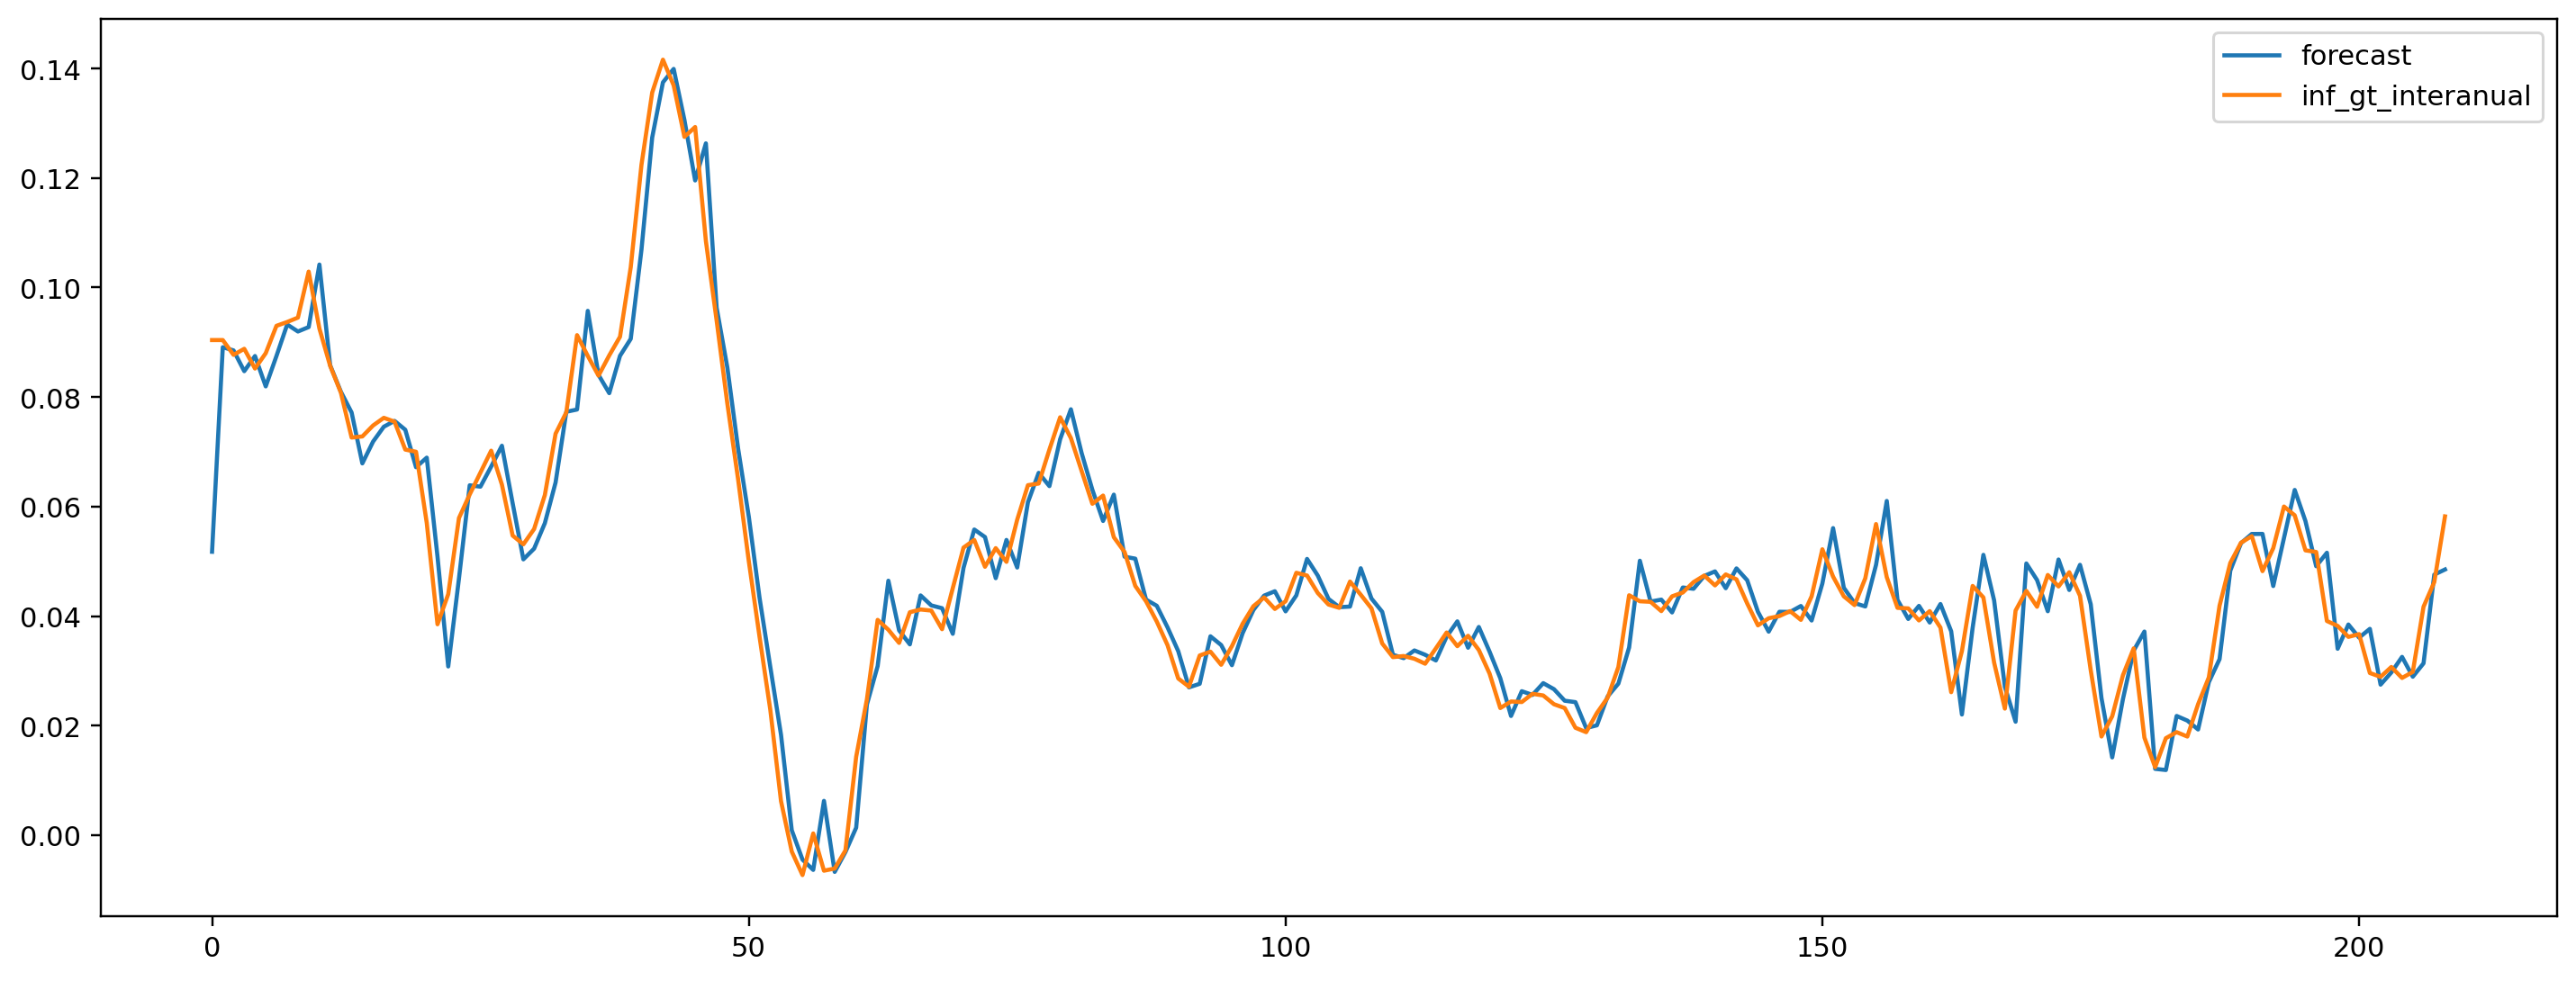

In [31]:
plt.rcParams.update({'figure.figsize':(16,6), 'figure.dpi':220})

#df = read_csv(filename)
#df = df.set_index('Year')

# ARIMA Model
model = ARIMA(inflacionInteranual.inf_gt_interanual, order=(2,0,0)) #cambiar a 2,0,0
model_fit = model.fit(disp=0)
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [36]:
modeloARIMAfitted = model_fit.predict()


## Utilizando Auto ARIMA

In [19]:
import pmdarima as pm

In [48]:
model_with_auto_d = pm.auto_arima(inflacionInteranual.inf_gt_interanual, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p, q
                      m=1,              # frequency of series
                      
                      d=None,           # let model determine 'd'
                      
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_with_auto_d.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1519.170, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-613.272, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1481.844, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1521.193, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1522.716, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1521.074, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1519.395, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1530.379, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1485.461, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1528.391, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1528.414, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1524.688, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1526.228, Time=0.19 sec

Best model:  ARIMA(2,0,0)

SARIMA MODEL

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [22]:
best_model = SARIMAX(inflacionInteranual.inf_gt_interanual, order=(2, 0, 0), seasonal_order=(0, 0, 0, 0)).fit(dis=-1)
print(best_model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.65721D+00    |proj g|=  5.90976D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     22      1     0     0   2.271D-01  -3.657D+00
  F =  -3.6572162217807054     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                                
Dep. Variable:      inf_gt_interanual   No. Observations:                  209
Model:               SARIMAX(2, 0, 0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Para interpretar

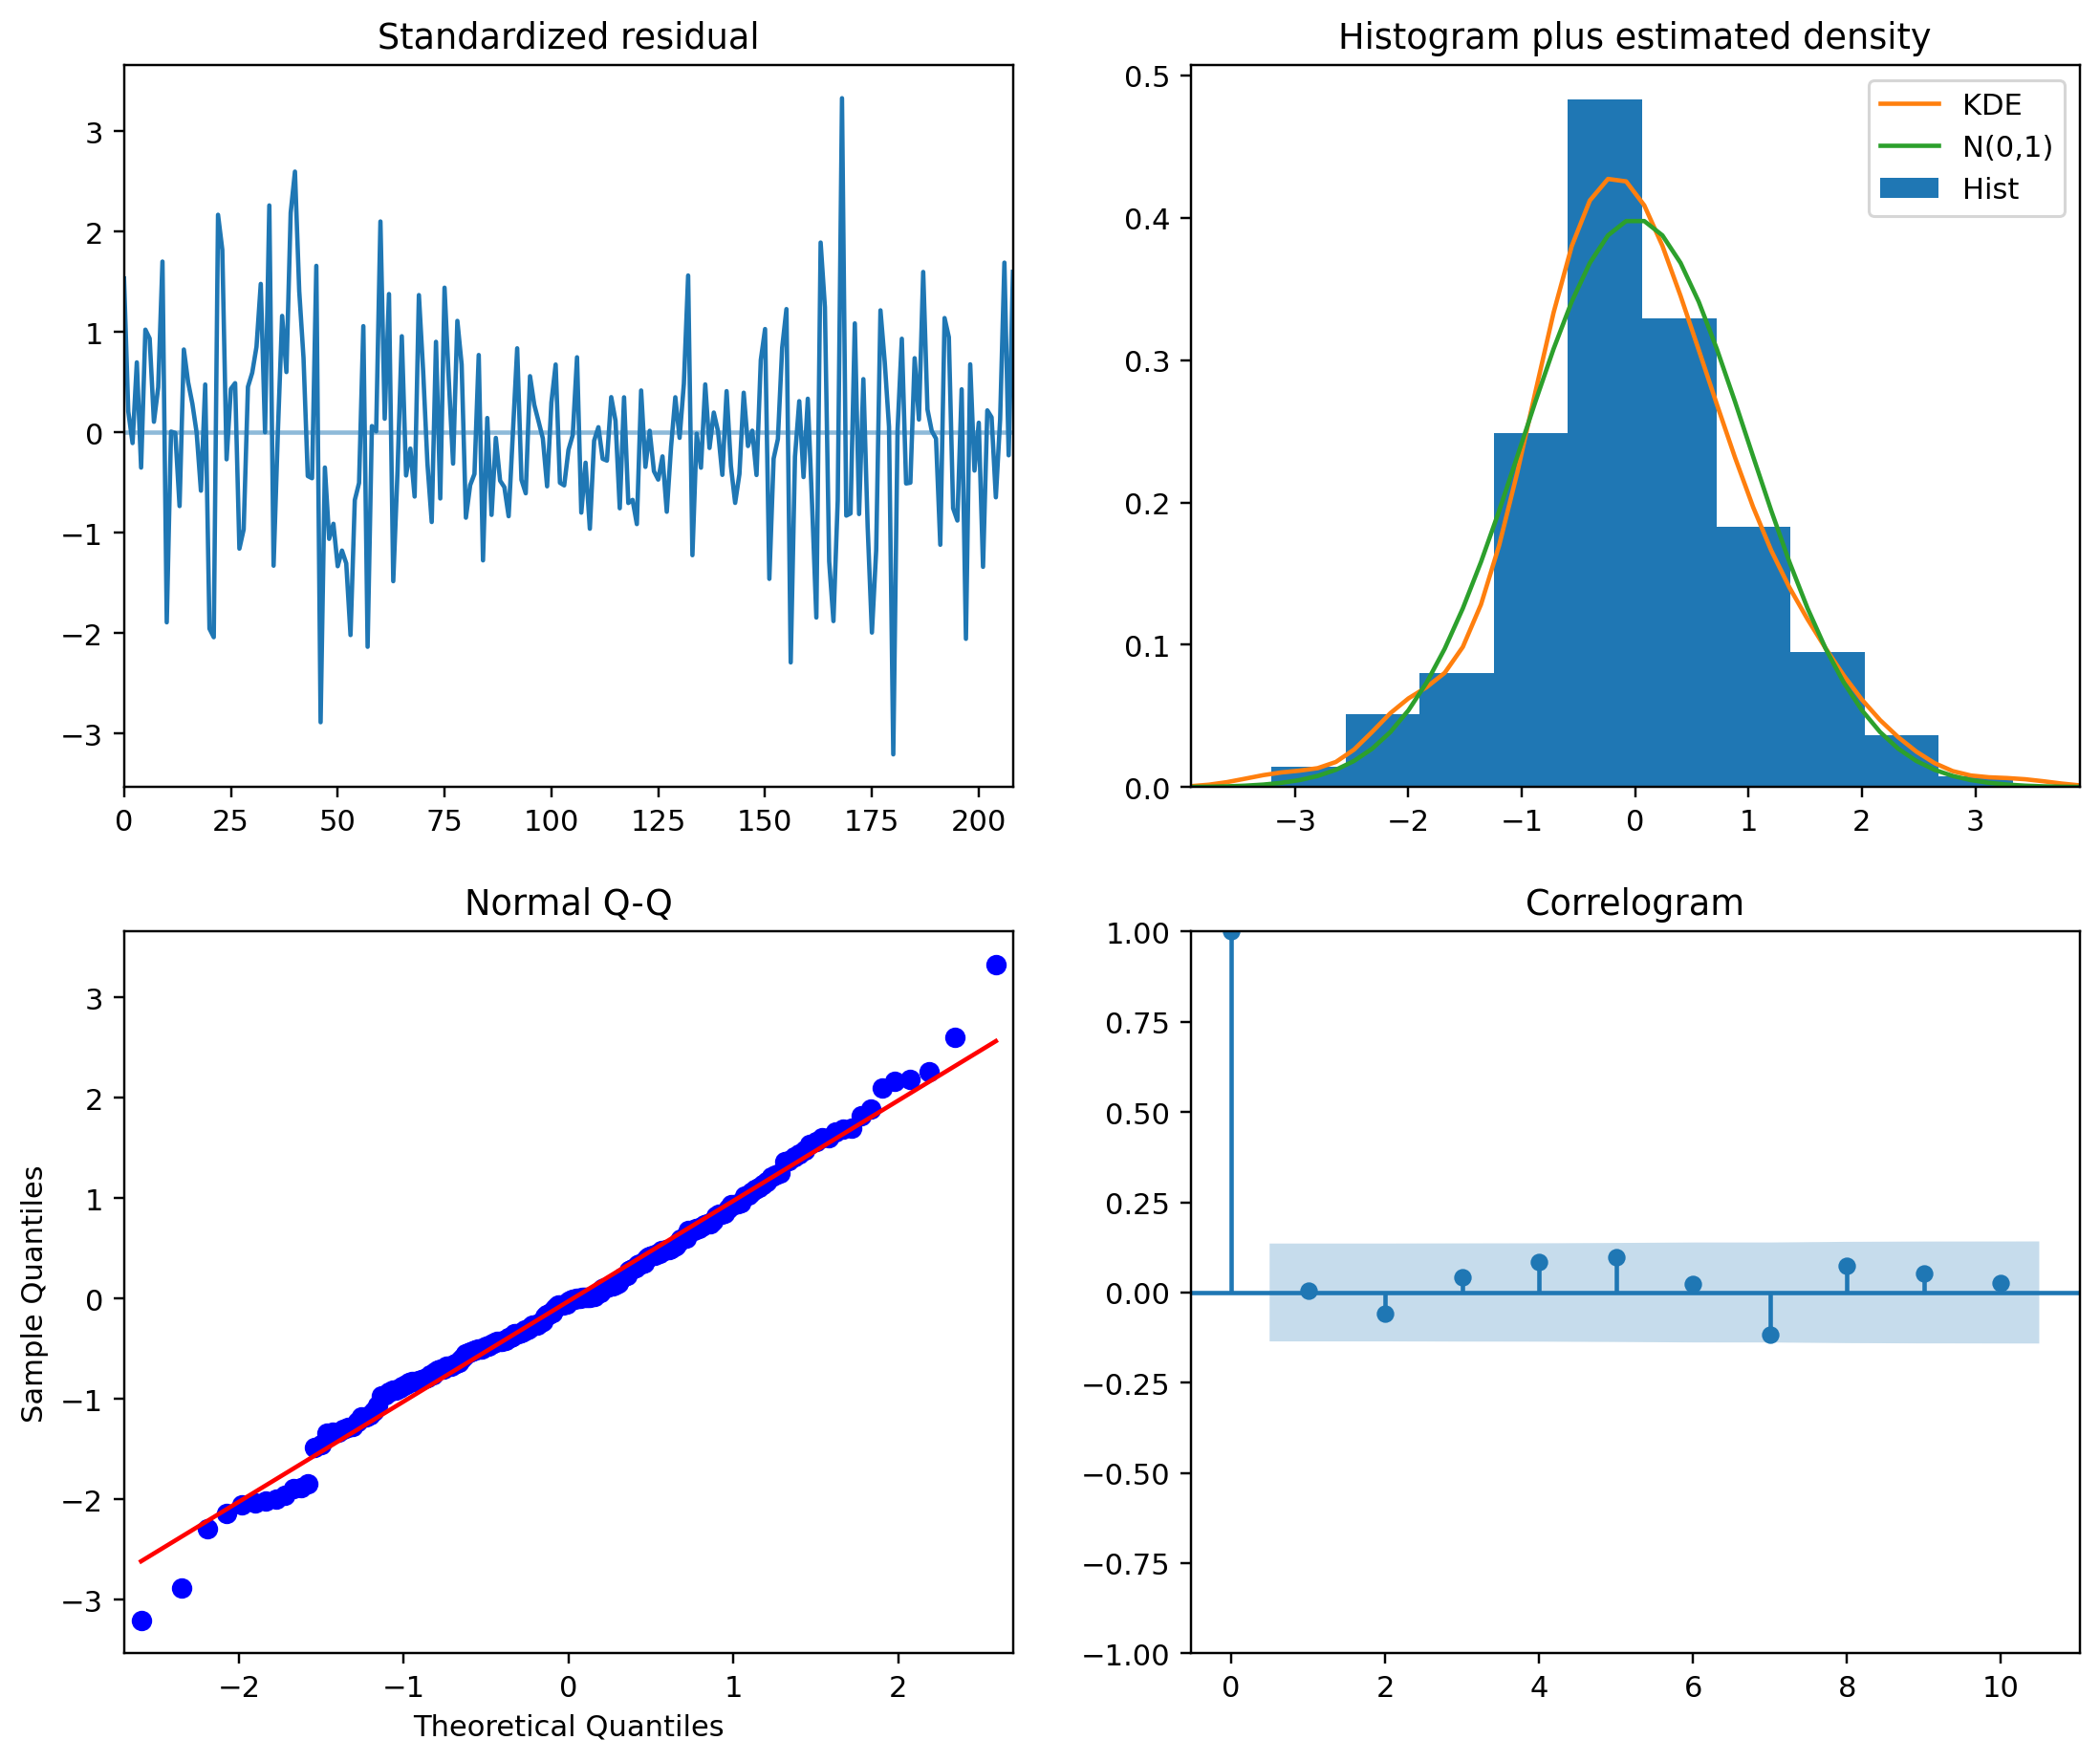

In [23]:
model_with_auto_d.plot_diagnostics(figsize=(12,10))
plt.show()

### PARA REALIZAR EL PRONOSTICO 

In [24]:
model = model_with_auto_d

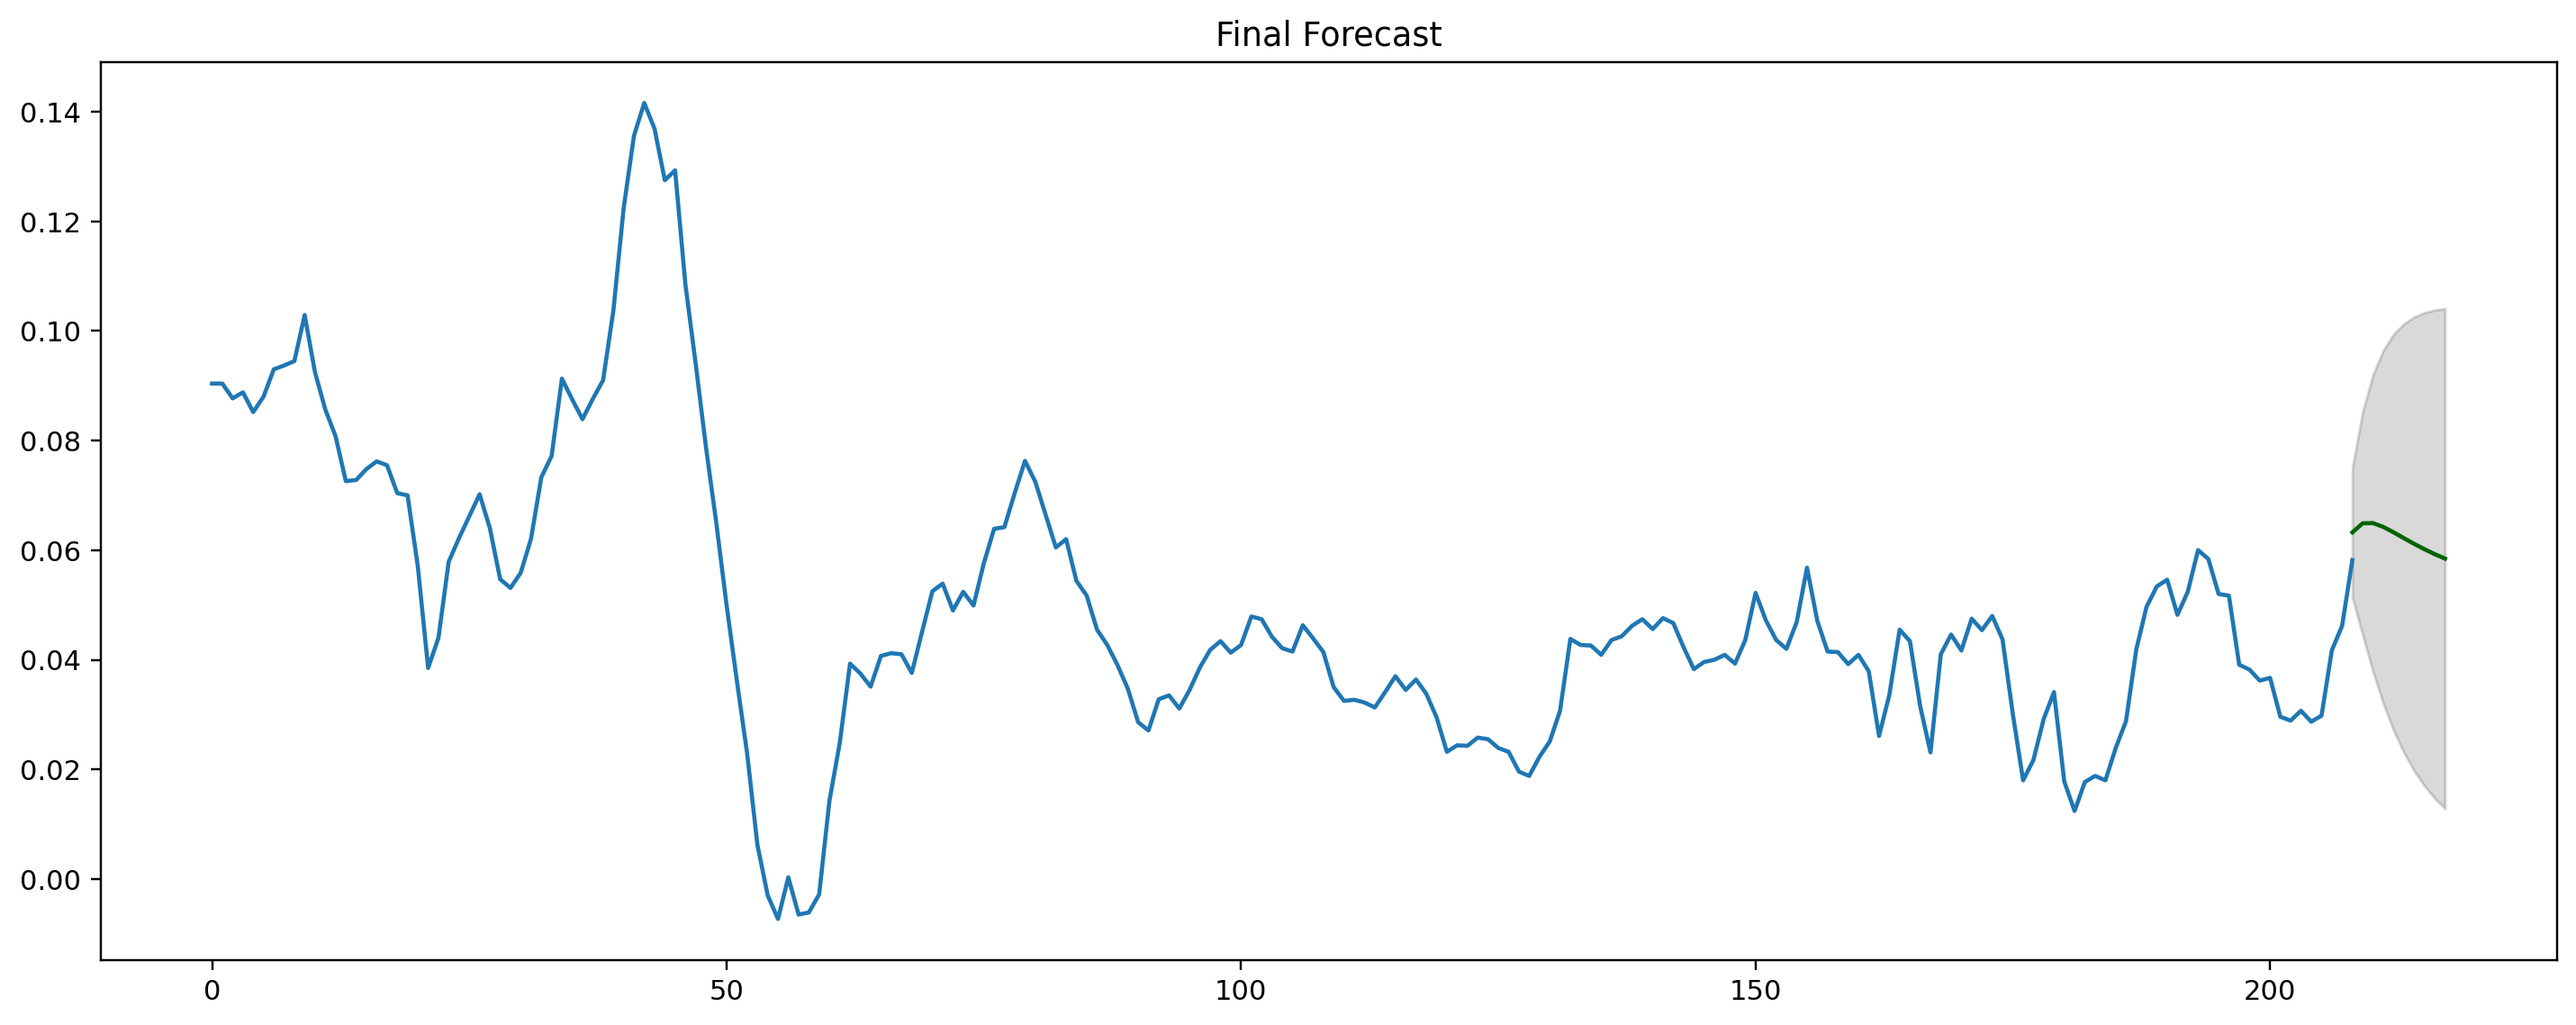


208    0.063250
209    0.064904
210    0.064940
211    0.064247
212    0.063261
213    0.062196
214    0.061152
215    0.060172
216    0.059274
217    0.058459
dtype: float64

208    0.051381
209    0.044509
210    0.037850
211    0.032025
212    0.027129
213    0.023079
214    0.019744
215    0.016997
216    0.014727
217    0.012842
dtype: float64

208    0.075120
209    0.085299
210    0.092030
211    0.096468
212    0.099392
213    0.101313
214    0.102559
215    0.103347
216    0.103821
217    0.104077
dtype: float64


In [27]:
# Forecast
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df)-1, len(df)+n_periods-1)
#index_of_fc = np.arange(2020, 2020+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(inflacionInteranual.inf_gt_interanual)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

print(); print(fc_series)
print(); print(lower_series)
print(); print(upper_series)

### El pronostico final del metodo tradicional                         
| Mes | Pronostico | Real |
| --- | --- | --- |
| Junio | 0.063250 | 7.55 |                                
| Julio | 0.064904 | 8.26 |
| Agosto | 0.064940 | tbd |

calculando el RMSE para este metodo

In [94]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [42]:
def rmsecalculation(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [134]:
rmseAnalisisTradicional = mean_squared_error(inflacionInteranual.inf_gt_interanual,modeloARIMAfitted, squared = False)
rmseAnalisisTradicional

0.006589887956239034

In [43]:
rmsecalculation(inflacionInteranual.inf_gt_interanual,modeloARIMAfitted)

0.006589887956239031

## Metodos de Machine Learning

### Random Forest & Linear Regression Models
Para el aprendizaje supervisado se necesita crear una columna de output

In [63]:
dfi = inflacionInteranual.copy()

In [67]:
dfi['Inflacion1Rezago'] = dfi['inf_gt_interanual'].shift(+1)
dfi['Inflacion2Rezago'] = dfi['inf_gt_interanual'].shift(+2)
dfi['Inflacion3Rezago'] = dfi['inf_gt_interanual'].shift(+3)

In [68]:
dfi

,Periodo,inf_gt_interanual,Inflacion1Rezago,Inflacion2Rezago,Inflacion3Rezago
0,01/01/2005,0.0904,NaN,NaN,NaN
1,01/02/2005,0.0904,0.0904,NaN,NaN
2,01/03/2005,0.0877,0.0904,0.0904,NaN
3,01/04/2005,0.0888,0.0877,0.0904,0.0904
4,01/05/2005,0.0852,0.0888,0.0877,0.0904
...,...,...,...,...,...
204,01/01/2022,0.0287,0.0307,0.0289,0.0296
205,01/02/2022,0.0298,0.0287,0.0307,0.0289
206,01/03/2022,0.0417,0.0298,0.0287,0.0307
207,01/04/2022,0.0462,0.0417,0.0298,0.0287


In [79]:
dfi = dfi.dropna()

In [80]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor


In [81]:
lin_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, max_features=3,random_state=1)

In [82]:
x1,x2,x3,y=dfi['Inflacion1Rezago'],dfi['Inflacion2Rezago'],dfi['Inflacion3Rezago'],dfi['inf_gt_interanual']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x2.reshape(-1,1),y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3),axis=1)
final_x

array([[ 0.0877,  0.0904,  0.0904],
       [ 0.0888,  0.0877,  0.0877],
       [ 0.0852,  0.0888,  0.0888],
       [ 0.088 ,  0.0852,  0.0852],
       [ 0.093 ,  0.088 ,  0.088 ],
       [ 0.0937,  0.093 ,  0.093 ],
       [ 0.0945,  0.0937,  0.0937],
       [ 0.1029,  0.0945,  0.0945],
       [ 0.0925,  0.1029,  0.1029],
       [ 0.0857,  0.0925,  0.0925],
       [ 0.0808,  0.0857,  0.0857],
       [ 0.0726,  0.0808,  0.0808],
       [ 0.0728,  0.0726,  0.0726],
       [ 0.0748,  0.0728,  0.0728],
       [ 0.0762,  0.0748,  0.0748],
       [ 0.0755,  0.0762,  0.0762],
       [ 0.0704,  0.0755,  0.0755],
       [ 0.07  ,  0.0704,  0.0704],
       [ 0.057 ,  0.07  ,  0.07  ],
       [ 0.0385,  0.057 ,  0.057 ],
       [ 0.044 ,  0.0385,  0.0385],
       [ 0.0579,  0.044 ,  0.044 ],
       [ 0.0622,  0.0579,  0.0579],
       [ 0.0662,  0.0622,  0.0622],
       [ 0.0702,  0.0662,  0.0662],
       [ 0.064 ,  0.0702,  0.0702],
       [ 0.0547,  0.064 ,  0.064 ],
       [ 0.0531,  0.0547,  0

In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = final_x[:-85],final_x[-85:],y[:-85],y[-85:]
rf_model.fit(x_train,y_train)
lin_model.fit(x_train,y_train)

LinearRegression()

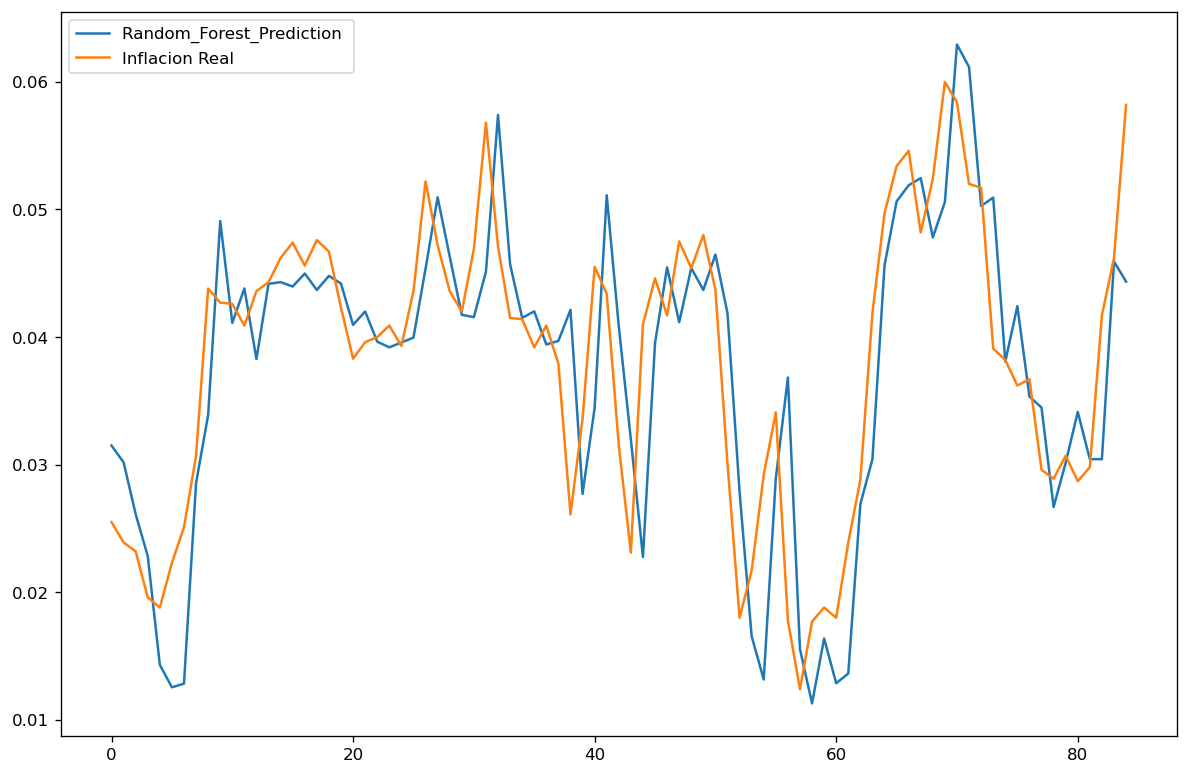

array([0.031497, 0.030187, 0.026116, 0.022828, 0.014315, 0.012551,
       0.012836, 0.028558, 0.033897, 0.04909 , 0.041118, 0.043807,
       0.038279, 0.044175, 0.044305, 0.043963, 0.044981, 0.043691,
       0.044795, 0.044188, 0.040953, 0.042005, 0.039637, 0.039197,
       0.039569, 0.039961, 0.045355, 0.050955, 0.046319, 0.041745,
       0.041562, 0.045117, 0.057416, 0.045713, 0.041504, 0.042015,
       0.039412, 0.039702, 0.042132, 0.027704, 0.034454, 0.051114,
       0.040824, 0.031966, 0.022756, 0.039526, 0.045465, 0.041162,
       0.045409, 0.043691, 0.046469, 0.041867, 0.027873, 0.01655 ,
       0.013163, 0.028929, 0.036831, 0.015546, 0.01129 , 0.016377,
       0.012868, 0.013629, 0.026908, 0.030422, 0.045608, 0.05063 ,
       0.051895, 0.052456, 0.047808, 0.050586, 0.062931, 0.061163,
       0.050268, 0.050938, 0.038075, 0.042422, 0.035333, 0.034479,
       0.026681, 0.030143, 0.03413 , 0.030433, 0.030428, 0.045928,
       0.044344])

In [141]:
rf_prediction = rf_model.predict(x_test)
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(rf_prediction, label = 'Random_Forest_Prediction ')
plt.plot(y_test, label = 'Inflacion Real')
plt.legend(loc="upper left")
plt.show()

rf_prediction 

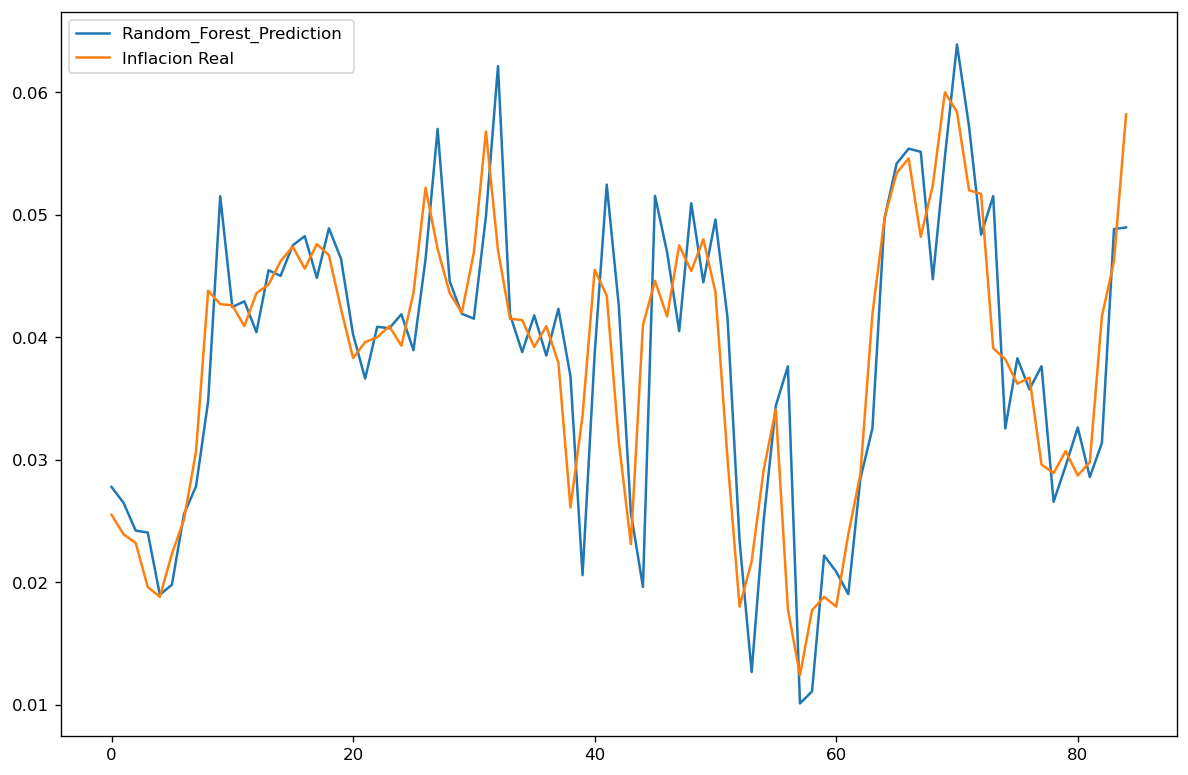

array([[0.0277709 ],
       [0.02647013],
       [0.02420815],
       [0.02404589],
       [0.01897051],
       [0.01978292],
       [0.02555132],
       [0.02783396],
       [0.0347651 ],
       [0.05151418],
       [0.04246359],
       [0.04293129],
       [0.04040472],
       [0.0454646 ],
       [0.04500723],
       [0.04749969],
       [0.04825264],
       [0.04484183],
       [0.0488945 ],
       [0.04640047],
       [0.04022227],
       [0.03662338],
       [0.04085176],
       [0.04072721],
       [0.04186931],
       [0.03893136],
       [0.04636589],
       [0.05701015],
       [0.04456894],
       [0.04191578],
       [0.0415127 ],
       [0.04985885],
       [0.06214029],
       [0.0418258 ],
       [0.03878146],
       [0.04178403],
       [0.03849777],
       [0.04231995],
       [0.03680426],
       [0.02056576],
       [0.03860794],
       [0.05246351],
       [0.04256953],
       [0.02567211],
       [0.01961283],
       [0.0515411 ],
       [0.04692763],
       [0.040

In [142]:
lin_prediction = lin_model.predict(x_test)
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(lin_prediction, label = 'Random_Forest_Prediction ')
plt.plot(y_test, label = 'Inflacion Real')
plt.legend(loc="upper left")
plt.show()

lin_prediction 

In [143]:
rmse_rf = sqrt(mean_squared_error(rf_prediction,y_test))
rmse_rf


0.0069589662805705325

In [144]:
rmse_lin = sqrt(mean_squared_error(lin_prediction,y_test))
rmse_lin

0.006412205158230733

In [133]:
rf_model.score(x_test,y_test )


0.9852602341792447

In [132]:
lin_model.score(x_test,y_test)

0.9611445812553812

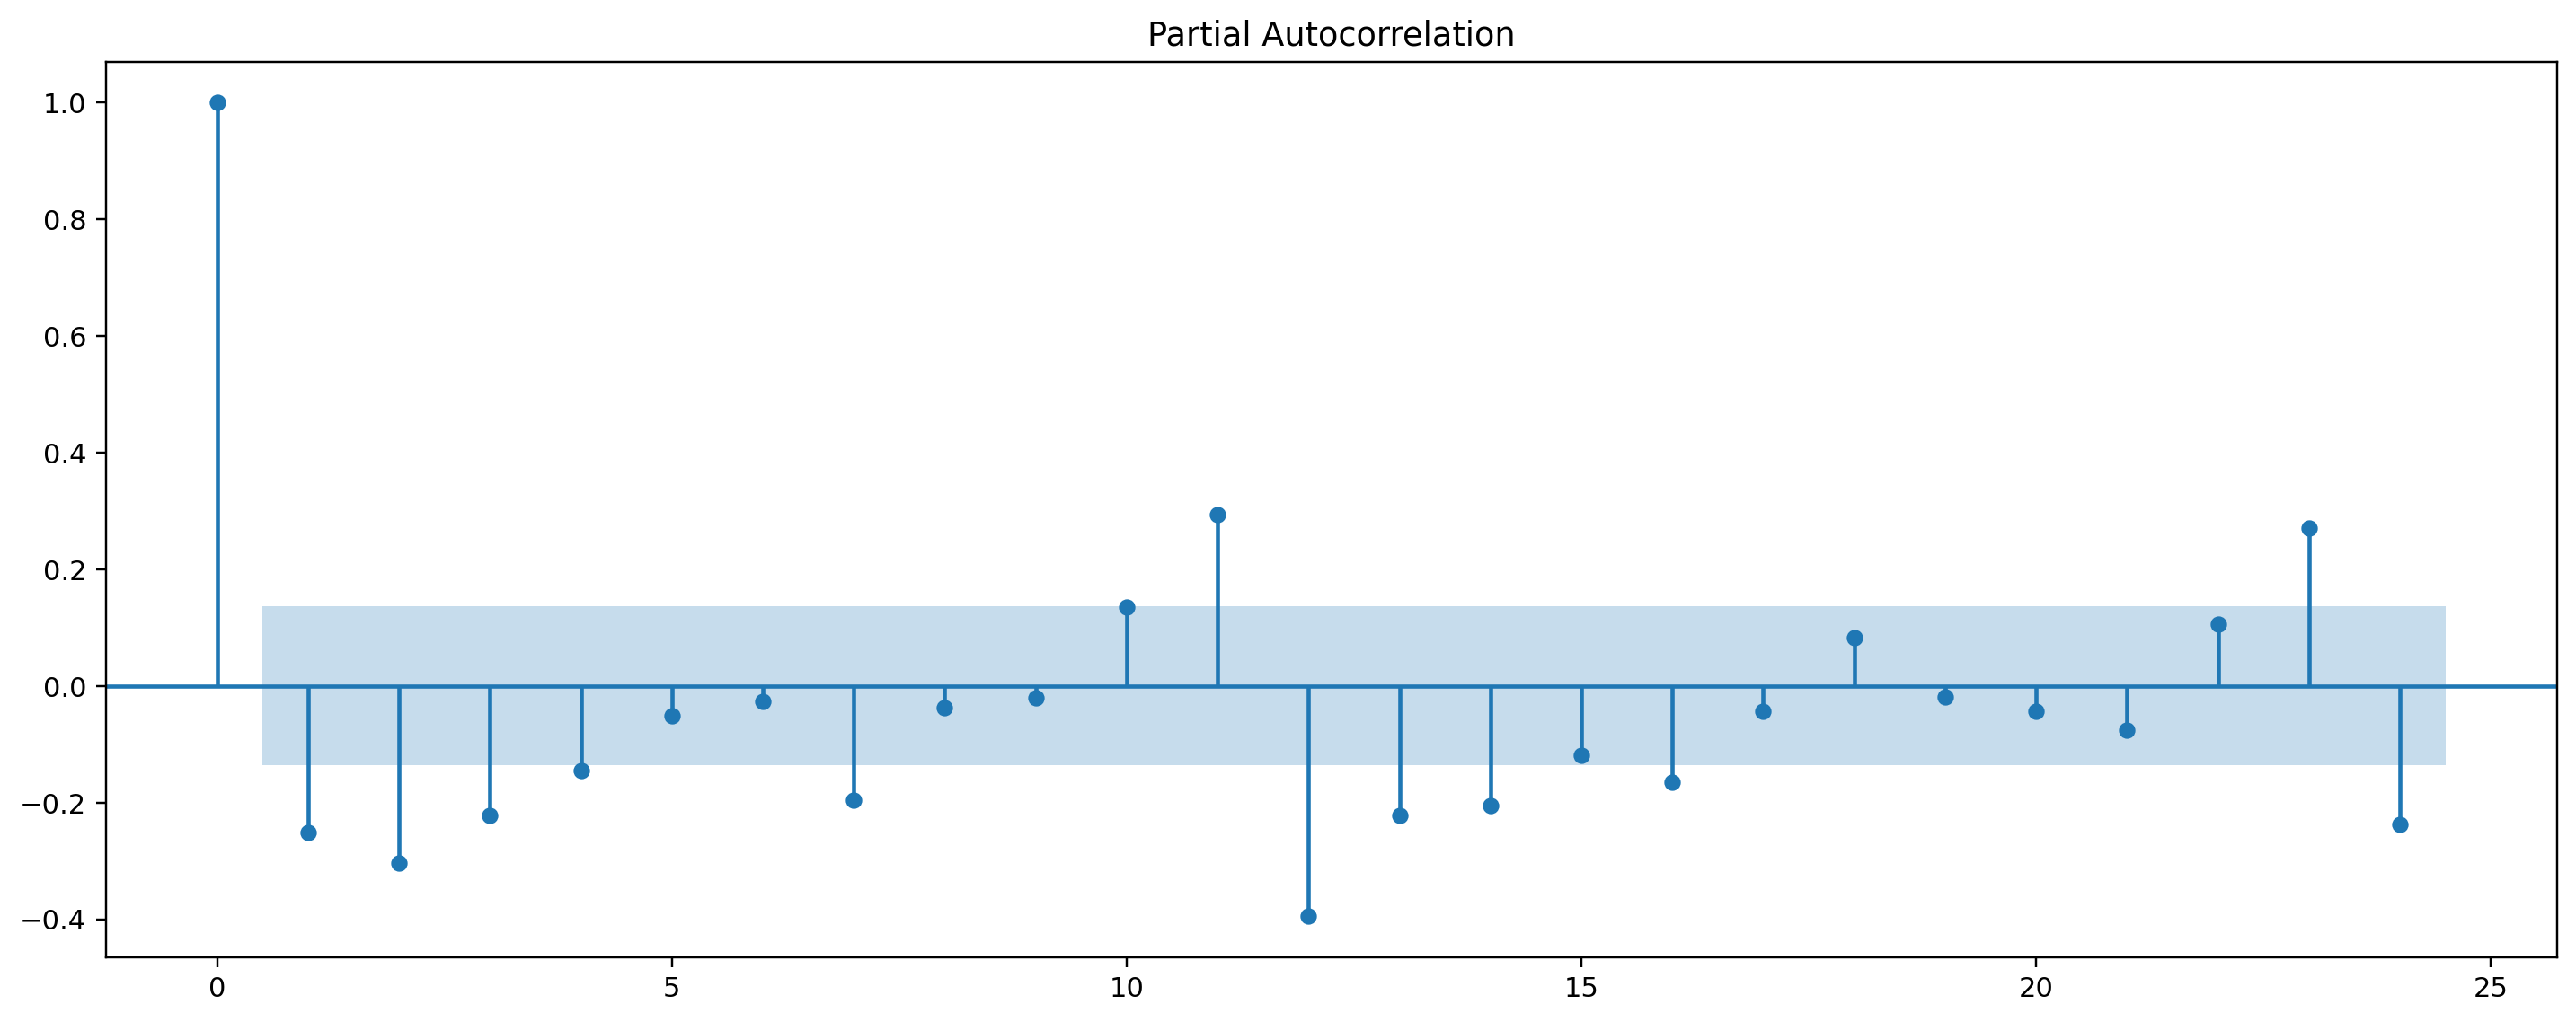

In [ ]:
plot_pacf(df2.dropna()) #PACF
plt.savefig(fname="imgtst.svg",path="/home/rednew/Documents/PES/TESIS/TesisPES2022")
plt.show()

## Describe nos da la informacion general de cada una de las categorias de la data
el formato es numerico estadistico de la informacion de cada columna

In [ ]:
inflacionInteranual.describe()

,inf_gt_interanual
count,257.000000
mean,0.053212
std,0.025989
min,-0.007300
25%,0.037000
50%,0.047400
75%,0.066500
max,0.141600


In [ ]:
music_data = df

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
model = DecisionTreeClassifier()from fbprophet import Prophet


In [ ]:
X = music_data.drop(columns = ['genre'])
y = music_data['genre']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Accuracy verification

In [ ]:
model.fit(x_train,y_train)
predictions = model.predict(x_test)

score = accuracy_score(y_test, predictions) 
score

0.5

Aca se guarda el analysis de los datos para no tener que cargarlos siempre


In [ ]:
joblib.dump(model, 'music-recomender.joblib')

['music-recomender.joblib']

Aca se cargan los datos guardados analizados previamente

In [ ]:
model = joblib.load('music-recomender.joblib')
predictions = model.predict([[21,1]])
predictions


array(['HipHop'], dtype=object)

# Decision Tree

In [ ]:
from sklearn import tree

a = tree.export_graphviz(model, out_file='music-recomender.dot', 
feature_names=['age', 'gender'], 
class_names=sorted(y.unique()),
label='all',
rounded = True,
filled= True)

ModuleNotFoundError: No module named 'graphviz'